In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.legend import _get_legend_handles_labels
import matplotlib.patches as mpl_patches
import numpy as np
import seaborn as sns
sns.set_theme(style="whitegrid")
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.ExcelFile(r'E:/rahul/MYD11C1 and MYD11A1 validation/Merged_LST.xlsx')
names=data.sheet_names
names

['Chakdha WB',
 'Chilika Odisha',
 'Dehradun Uttrakhand',
 'Hoshangabad MP',
 'Kutch Gujrat',
 'Narayangarh Punjab',
 'Jaisalmer Rajasthan']

In [3]:
file=pd.read_excel(r'E:/rahul/MYD11C1 and MYD11A1 validation/Merged_LST.xlsx',1, na_values=['#VALUE!', '#DIV/0!'])
file

,Date,Long_In,Long_out,Time,Day_LST_A1_1KM,emiss_1KM,time,Day_LST_A1_6KM,emiss_6KM,MYD11C1,Ground_LST_1KM_emiss,Ground_LST_6KM_emiss,Error_A1_1KM,Error_A1_6KM,Error_C1_6KM
0,2010-05-14,517,544,13:30:00,309.50,0.986,13.5,312.10,0.985,311.899994,313.026026,313.030022,-3.526026,-0.930022,-1.130028
1,2010-05-16,516,541,13:30:00,308.58,0.985,13.3,309.76,0.985,309.339996,312.593490,312.593490,-4.013490,-2.833490,-3.253494
2,2010-05-18,520,551,13:00:00,308.54,0.986,13.1,308.10,0.985,309.220001,314.035564,314.040108,-5.495564,-5.940108,-4.820107
3,2010-05-26,536,539,14:00:00,303.08,0.987,14.0,304.86,0.985,302.820007,312.254989,312.255883,-9.174989,-7.395883,-9.435875
4,2010-05-27,543,543,13:00:00,304.02,0.985,13.0,303.96,0.985,305.380005,312.826973,312.826973,-8.806973,-8.866973,-7.446968
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,2011-02-25,396,504,13:00:00,305.12,0.983,12.8,306.58,0.984,306.059998,307.336035,307.319075,-2.216035,-0.739075,-1.259077
75,2011-02-26,397,508,13:30:00,310.56,0.986,13.5,308.96,0.985,309.579987,307.897732,307.914995,2.662268,1.045005,1.664991
76,2011-02-28,402,500,13:30:00,307.92,0.985,13.3,307.12,0.985,306.940002,306.669314,306.669314,1.250686,0.450686,0.270689
77,2011-02-03,410,514,13:30:00,305.40,0.987,13.4,304.28,0.985,305.320007,308.769204,308.801244,-3.369204,-4.521244,-3.481237


In [4]:
# Error range -l to +l
l=8

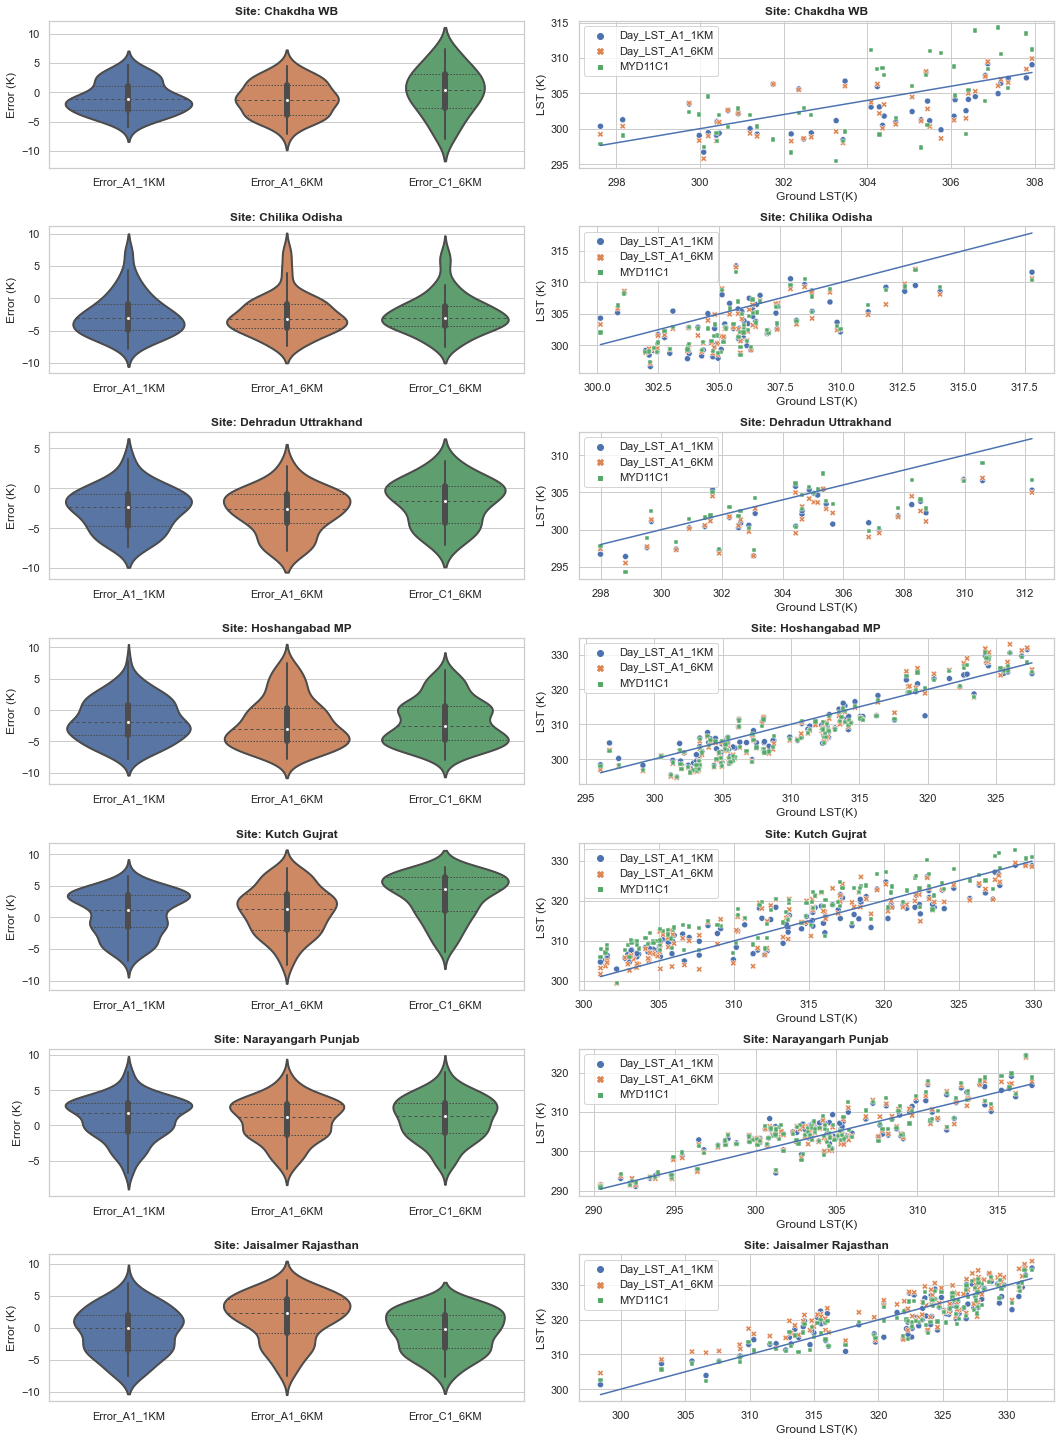

In [5]:

fig, axs = plt.subplots(7, 2,figsize=(15,20));
for i in range(7):
    file=pd.read_excel(r'E:/rahul/MYD11C1 and MYD11A1 validation/Merged_LST.xlsx',i, na_values=['#VALUE!', '#DIV/0!'])
    file.set_index('Date', inplace=True)
    file=file[["Day_LST_A1_1KM","Day_LST_A1_6KM","MYD11C1","Ground_LST_1KM_emiss","Ground_LST_6KM_emiss","Error_A1_1KM","Error_A1_6KM","Error_C1_6KM"]]
    file=file.dropna()
    file=file.astype('float32')
    file=file[(file['Error_A1_1KM']>-l) & (file['Error_A1_1KM']<l) & (file['Error_A1_6KM']>-l) & (file['Error_A1_6KM']<l) & (file['Error_C1_6KM']>-l) &(file['Error_C1_6KM']<l)]
    Error_E1=file[["Error_A1_1KM","Error_A1_6KM","Error_C1_6KM"]]

    LST_E2=file[["Ground_LST_6KM_emiss","Day_LST_A1_1KM","Day_LST_A1_6KM","MYD11C1"]]
    LST_E2.set_index('Ground_LST_6KM_emiss', inplace=True)
    
#     Bias=np.array(Error_E1.mean(axis=0)).round(2)
#     RMSE=np.array(((Error_E1**2).mean(axis=0))**0.5).round(2)
#     Correlation=LST_E2.corr()
#     C=(np.array(Correlation).round(2))[:,0]


    fig.tight_layout()
    sns.violinplot(data=Error_E1,inner='quartile',linewidth=1,ax=axs[i,0])
    sns.violinplot(data=Error_E1,inner='box',linewidth=2,ax=axs[i,0])
    sns.scatterplot(data=LST_E2,ax=axs[i,1])
    sns.lineplot(LST_E2.index,LST_E2.index,ax=axs[i,1],legend = False)
    
    axs[i,0].set_title('Site: '+ str(names[i]),fontweight ="bold");
    axs[i,0].set(ylabel='Error (K)')
    axs[i,1].set_title('Site: '+ str(names[i]),fontweight ="bold");
    axs[i,1].set(xlabel='Ground LST(K)', ylabel='LST (K)')
#     r='RMSE: '+str(RMSE[0])+', '+str(RMSE[1])+', '+str(RMSE[2])
#     b='Bias: '+str(Bias[0])+', '+str(Bias[1])+', '+str(Bias[2])
#     axs[i,0].text(0.05, 0.95, r, horizontalalignment='left', verticalalignment='bottom', transform=axs[i,0].transAxes)
#     axs[i,0].text(0.05, 0.85, b, horizontalalignment='left', verticalalignment='bottom', transform=axs[i,0].transAxes)

fig.subplots_adjust(hspace=0.4)
plt.show()
fig.savefig(r'E:/rahul/MYD11C1 and MYD11A1 validation/violinplot.jpeg',dpi=400)

In [6]:
for i in range(len(names)):
    file=pd.read_excel(r'E:/rahul/MYD11C1 and MYD11A1 validation/Merged_LST.xlsx',i, na_values=['#VALUE!', '#DIV/0!'])
    file.set_index('Date', inplace=True)
    file=file[["Day_LST_A1_1KM","Day_LST_A1_6KM","MYD11C1","Ground_LST_1KM_emiss","Ground_LST_6KM_emiss","Error_A1_1KM","Error_A1_6KM","Error_C1_6KM"]]
    file=file.dropna()
    file=file.astype('float32')
    file=file[(file['Error_A1_1KM']>-l) & (file['Error_A1_1KM']<l) & (file['Error_A1_6KM']>-l) & (file['Error_A1_6KM']<l) & (file['Error_C1_6KM']>-l) &(file['Error_C1_6KM']<l)]
    Error_E1=file[["Error_A1_1KM","Error_A1_6KM","Error_C1_6KM"]]
    LST_E2=file[["Ground_LST_6KM_emiss","Day_LST_A1_1KM","Day_LST_A1_6KM","MYD11C1"]]
    
    Bias=np.array(Error_E1.mean(axis=0)).round(2)
    RMSE=np.array(((Error_E1**2).mean(axis=0))**0.5).round(2)
    Correlation=LST_E2.corr()
    C=(np.array(Correlation).round(3))
    print('site:'+str(names[i]))
    print('Bias:')
    print(Bias)
    print('RMSE:')
    print(RMSE)
    print('Correlation with ground LST')
    print(C)
    print('-------------------------------')

site:Chakdha WB
Bias:
[-1.  -1.1  0.2]
RMSE:
[2.8  3.03 3.97]
Correlation with ground LST
[[1.    0.616 0.625 0.644]
 [0.616 1.    0.976 0.465]
 [0.625 0.976 1.    0.541]
 [0.644 0.465 0.541 1.   ]]
-------------------------------
site:Chilika Odisha
Bias:
[-2.63 -2.65 -2.5 ]
RMSE:
[4.15 4.03 3.87]
Correlation with ground LST
[[1.    0.577 0.585 0.62 ]
 [0.577 1.    0.96  0.962]
 [0.585 0.96  1.    0.972]
 [0.62  0.962 0.972 1.   ]]
-------------------------------
site:Dehradun Uttrakhand
Bias:
[-2.56 -2.78 -1.67]
RMSE:
[3.66 3.88 3.25]
Correlation with ground LST
[[1.    0.668 0.642 0.65 ]
 [0.668 1.    0.969 0.947]
 [0.642 0.969 1.    0.987]
 [0.65  0.947 0.987 1.   ]]
-------------------------------
site:Hoshangabad MP
Bias:
[-1.56 -1.97 -1.93]
RMSE:
[3.71 4.35 4.05]
Correlation with ground LST
[[1.    0.932 0.94  0.941]
 [0.932 1.    0.989 0.988]
 [0.94  0.989 1.    0.997]
 [0.941 0.988 0.997 1.   ]]
-------------------------------
site:Kutch Gujrat
Bias:
[0.68 1.09 3.37]
RMSE:
[3.